In [1]:
    # loading the dataset
    import pandas as pd
    import numpy as np
    %matplotlib inline
    import matplotlib.pyplot as plt
    import warnings
    warnings.simplefilter('ignore', DeprecationWarning)
    df = pd.read_csv('dataset/ks-projects-201612-cleaned.csv',  sep = ',')    

In [2]:
print(df.head())

   uniqueId                                              name   \
0      5971              An American Apocalypse: The Reckoning   
1     18520                                 Grandma's are Life   
2     21109                                               Meta   
3     21371                                  Water Powered Car   
4     24380  Puss N' Books: A relaxing cat cafe and bookstore.   

         category  main_category  currency          deadline     goal   \
0           Comics         Comics       USD    8/6/2012 20:00  48000.0   
1      World Music          Music       USD  11/18/2016 15:32  15000.0   
2  Performance Art            Art       GBP    5/6/2015 23:00    150.0   
3       Technology     Technology       USD   8/10/2016 19:02  75000.0   
4           Spaces           Food       USD  11/26/2015 17:25  20000.0   

          launched   pledged       state   backers  country   
0    6/8/2012 18:46     376.0      failed         7       US  
1  10/19/2016 15:32      62.0   

In [3]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319556 entries, 0 to 319555
Data columns (total 12 columns):
uniqueId          319556 non-null int64
name              319554 non-null object
category          319556 non-null object
main_category     319556 non-null object
currency          319556 non-null object
deadline          319556 non-null object
goal              319556 non-null float64
launched          319556 non-null object
pledged           319556 non-null float64
state             319556 non-null object
backers           319556 non-null int64
country           319556 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 29.3+ MB
None


In [4]:
print (df.dtypes)

uniqueId            int64
name               object
category           object
main_category      object
currency           object
deadline           object
goal              float64
launched           object
pledged           float64
state              object
backers             int64
country            object
dtype: object


In [5]:
df.describe()

,uniqueId,goal,pledged,backers
count,3.195560e+05,3.195560e+05,3.195560e+05,319556.000000
mean,1.074799e+09,4.762898e+04,8.768322e+03,102.767775
std,6.193688e+08,1.145902e+06,9.008106e+04,940.051571
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000
25%,5.374245e+08,2.000000e+03,3.000000e+01,2.000000
50%,1.075709e+09,5.000000e+03,6.100000e+02,12.000000
75%,1.611023e+09,1.500000e+04,3.940000e+03,55.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000


## Visualize Interesting Attributes:

In [30]:
#looking at frequency of projects by currency
currency_list = df.groupby('currency ').count()
del currency_list['name ']
del currency_list['category ']
del currency_list['main_category ']
del currency_list['deadline ']
del currency_list['goal ']
del currency_list['launched ']
del currency_list['pledged ']
del currency_list['state ']
del currency_list['backers ']
del currency_list['country ']

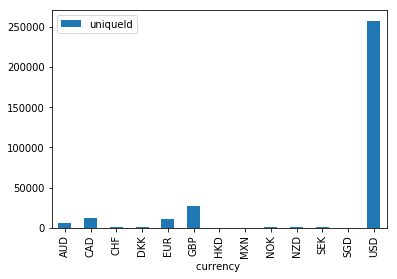

In [13]:
plt.figure(); 
currency_list.plot(kind='bar')

The 'currency' variable is interesting because it provides insight into the geographic distribution of Kickstarter projects. We found it more useful to look at this before the country variable because currency combines most of Europe into a single unit thus reducing the number of elements. Ultimately, the visualization implies that Kickstarter is dominated by English-speaking countries as four out of the top five currencies are from said nations (US, UK, Canada, and Australia). However, it should be noted that since the US dollar is used extensively internationally, it is worth examining the 'country' variable to see if the US is overrepresented in this visualization. 

In [27]:
#looking at frequency of projects by country
country_list = df.groupby('country ').count()
del country_list['name ']
del country_list['category ']
del country_list['main_category ']
del country_list['deadline ']
del country_list['goal ']
del country_list['launched ']
del country_list['pledged ']
del country_list['state ']
del country_list['backers ']
del country_list['currency ']

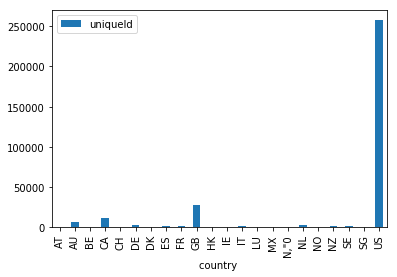

In [22]:
plt.figure(); 
country_list.plot(kind='bar')

This visualization provides further evidence in support of the results from the previous graph - Kickstarter projects are dominated by the English-speaking countries. However, it is important to note that this is only the case for the countries present in the dataset. We do not know why some countries were selected and others were not.

Regarding the US dollar's international appeal having a possible effect, there does not appear to be a significant difference when looking at number of projects by currency vs. country. 

In [28]:
#looking at the main categories for the projects
category_list = df.groupby('main_category ').count()
del category_list['name ']
del category_list['category ']
del category_list['state ']
del category_list['deadline ']
del category_list['currency ']
del category_list['goal ']
del category_list['launched ']
del category_list['pledged ']
del category_list['backers ']
del category_list['country ']

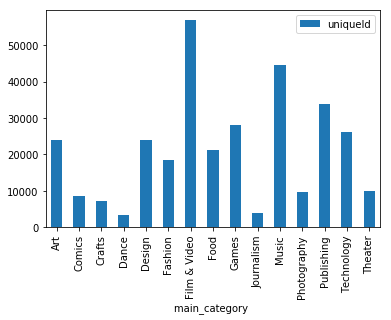

In [24]:
plt.figure(); 
category_list.plot(kind='bar')

The frequency chart for the 'main_categories' variable shows a good variety of different types of projects. It seems like Kickstarter has a lot of projects for creative pursuits. The three largest categories are Film & Video, Music, and Publishing. The only category that isn't really considered a creative pursuit would be the Technology category. 

In [29]:
#looking at projects based upon state of success
state_list = df.groupby('state ').count()
del state_list['name ']
del state_list['category ']
del state_list['main_category ']
del state_list['deadline ']
del state_list['currency ']
del state_list['goal ']
del state_list['launched ']
del state_list['pledged ']
del state_list['backers ']
del state_list['country ']

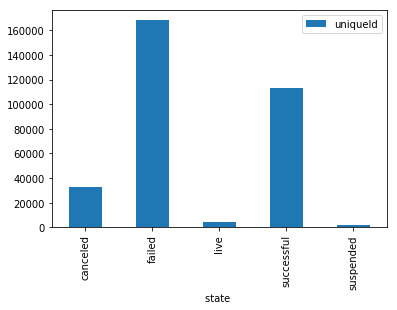

In [18]:
plt.figure(); 
state_list.plot(kind='bar')

The 'state' variable is a critical metric for success - it basically represents the situation where the value for 'pledged' is greater than the value for 'goal'. The visualization reveals that even though over half of the projects failed, about a third of the projects were successful. Furthermore, canceled projects is a significant minority of the total number of projects. Finally, live projects and suspended projects both comprise a tiny fraction of the total. 